# Clustering using IRIS Dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
data = pd.read_csv("iris.csv")
data = data.iloc[:, [0,1,2,3]].values

#### Normalized Using Min-Max method
***
## $ \frac{x_{new} - x_{min_{new}}}{x_{min_{new}}-x_{max_{new}}} = \frac{x_{old} - x_{min_{old}}}{x_{min_{old}}-x_{max_{old}}} $
***

In [3]:
def normalize(c):
    maxi = c.max()
    mini = c.min()
    for i in range(len(c)):
        c[i] = (c[i]-mini)/float(maxi-mini)

#### Euclidean Distance
***

### $d(x,y) {=} \left(\sum_{i=1}^n (x_i^2-y_i^2)\right)^2$


***

In [4]:
def eucl_dist(a,b):
    dista = 0
    for i in range(4):
        dista += (a[i]-b[i])**2
    return math.sqrt(dista)

In [5]:
#  NORMALIZING THE DATA
for i in range(4):
    normalize(data[:,i])

In [6]:
# DISSIMALIRITY
disim = np.zeros((150,150))
for i in range(150):
    for j in range(150):
        disim[i][j] = eucl_dist(data[i],data[j])

In [7]:
# CLUSTERING
cls = []
for i in range(150):
    avrg= np.average(disim[i])
    d = []
    for j in range(150):
        if(disim[i][j]< avrg):
            d.append(j)
    cls.append(d)

In [8]:
# REMOVING SUBSETS
def sixthstep(aa):
    l = len(aa)
    for i in range(l):
        for j in range(l):
            if(i!=j and set(aa[j]).issubset(set(aa[i]))):
                aa[j]=[]
    # REMOVING EMPTY SUBSETS
    new_cls = []
    for i in range(l):
        if(len(aa[i])!=0):
            new_cls.append(aa[i])
    return new_cls

Similarity Matrix using **Jaccard Similarity method**
***

  ### $ C_{ij} = \frac{|C_i \cap C_j|}{|C_i \cup C_j|} $

***


In [9]:
def seventh(a):
    length = len(a) #Dekhna hai idhar
    sim = np.zeros((length,length))
    for i in range(length):
        for j in range(length):
            sim[i][j] = len(set(a[i]).intersection(set(a[j]))) / float(len(set(a[i]).union(set(a[j]))))
    return sim

In [10]:
def eighth(sim):
    l = len(sim)
    k = 0
    m = 0
    maxi=-1
    for i in range(l):
        for j in range(l):
            if(i!=j and maxi==-1):
                maxi = sim[i][j] 
            elif(sim[i][j]>=maxi and i!=j):
                k = i
                m = j
    return k,m

In [11]:
while(len(cls)!=4):
    count=0
    cls = sixthstep(cls)
    sima = seventh(cls)
    i,j = eighth(sima)
    new = list(set(cls[i]).union(set(cls[j])))
    cls[i] = []
    cls[j] = []
    cls.append(new)
    l = len(cls)
    new_cls = []
    for i in range(l):
        if(len(cls[i])!=0):
            new_cls.append(cls[i])
    cls = new_cls
    k  = len(cls)
print('Number of Clusters -',len(cls),end=" ")

Number of Clusters - 4 

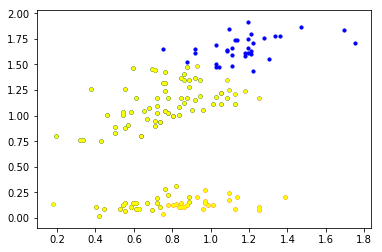

In [12]:
colors=["red","blue","green","yellow"]    
for i in range(4):
    for j in range(len(cls[i])):
        plt.scatter(data[cls[i][j]][0]+data[cls[i][j]][1],data[cls[i][j]][2]+data[cls[i][j]][3],s = 10, c = colors[i], marker='o')

# <font color=red>Extension - Elimination of Overlapped datapoints</font>


In [13]:
def EEDD(a):
#     return math.sqrt(a[0]**2 + a[1]**2+a[2]**2+a[3]**2)
    return a[0]+a[1]+a[2]+a[3]

In [14]:
pp = np.array([[float(2) for i in range(k)] for h in range(150)])
centroid = []
wow = []
old_wow=0
mean= []
for i in range(k):
    mean = []
    wow = []
    for l in range(k):
        for j in range(len(cls[i])):
            wow.append(data[cls[i][j]][l])
        mean.append(np.median(wow))
    centroid.append(mean)

In [15]:
def nikl(i,a):
    total_dist=0
    dist = 0
    for m in a:
        total_dist += math.sqrt((data[i][0]-centroid[m][0])**2 + (data[i][1]-centroid[m][1])**2 + (data[i][2]-centroid[m][2])**2 + (data[i][3]-centroid[m][3])**2)  
    for m in a:
        dist = math.sqrt((data[i][0]-centroid[m][0])**2 + (data[i][1]-centroid[m][1])**2 + (data[i][2]-centroid[m][2])**2 + (data[i][3]-centroid[m][3])**2)  
        pp[i][m] = (dist/total_dist)

In [16]:
dekh = []
for i in range(150):
    dkh = []
    for j in range(k):
        if i in cls[j]:
            dkh.append(j)
    nikl(i,dkh)
    dekh.append(dkh)        

In [17]:
cls2 = [[],[],[],[]]
mini = 4
ind = 0
for i in range(150):
    cls2[pp[i].argmin()].append(i)

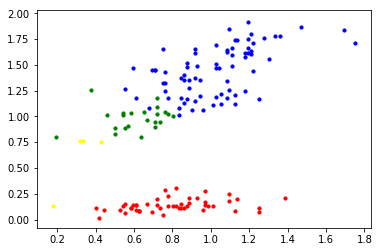

In [18]:
colors=["red","blue","green","yellow"]    
for i in range(4):
    for j in range(len(cls2[i])):
        plt.scatter(data[cls2[i][j]][0]+data[cls2[i][j]][1],data[cls2[i][j]][2]+data[cls2[i][j]][3],s =10, c = colors[i], marker='o')